In [48]:
from scipy.spatial import distance as distt
from imutils import perspective
from imutils import contours
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt


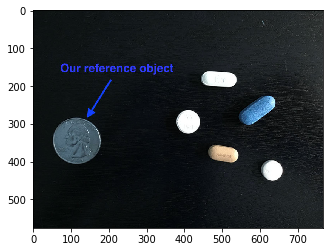

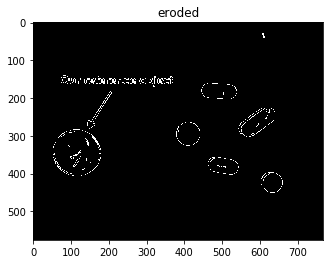

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [82]:
def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) * 0.5 , (ptA[A] + ptB[1]) * 0.5)


image = cv2.imread("images/coin_image.jpg")
plt.imshow(image, cmap = 'gray')
plt.show()
#width of the left object in imahe in inches
#width_left_most = 

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)
# plt.imshow(gray, cmap = 'gray')
# plt.title("gray")
# plt.show()

#perform edge detection, then perform a dilation + erosion
# to close gaps in between object edges
edged = cv2.Canny(gray, 50, 100)
# plt.imshow(edged, cmap = 'gray')
# plt.title("canny edged")
# plt.show()
edged = cv2.dilate(edged, None, iterations=1)
# plt.imshow(edged, cmap = 'gray')
# plt.title("dilated")
# plt.show()
edged = cv2.erode(edged, None, iterations = 1);
plt.imshow(edged, cmap = 'gray')
plt.title("eroded")
plt.show()


#find the contours in the edge map
#cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
im2, cnts, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2 else cnts[1]

# sort the contours from left-to-right and initialize the
# 'pixels per metric' calibration variable
(cnts, _) = contours.sort_contours(cnts)
pixelsPerMetric = None


#loop over the contours individually
for c in cnts:
     
    print(cv2.contourArea(c))
    # if the contour is not sufficiently large, ignore it
    if cv2.contourArea(c) < 100:
        continue
    
    print("boxing")
            
    #compute the rotated bounding box of the contour
    orig = image.copy
    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")
    
    # order the points in the contour such that they appear
    # in top-left, top-right, bototm-right, bottom-left
    # order, then draw the outline of the rotated boundary box
    box = perpective.order_points(box)
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)

    
    # loop over the original points and draw them
    # draw the outline of the object in green, followed by drawing the vertices of the 
    # ounding box rectangle in as small, red circles.
    for (x, y) in box:
        cv2.circle(orig, (int(x)), (int(y)), 5, (0, 0, 255), -1)
    
    
    
    
#     	# unpack the ordered bounding box, then compute the midpoint
# 	# between the top-left and top-right coordinates, followed by
# 	# the midpoint between bottom-left and bottom-right coordinates
# 	(tl, tr, br, bl) = box
# 	(tltrX, tltrY) = midpoint(tl, tr)
# 	(blbrX, blbrY) = midpoint(bl, br)
 
# 	# compute the midpoint between the top-left and top-right points,
# 	# followed by the midpoint between the top-righ and bottom-right
# 	(tlblX, tlblY) = midpoint(tl, bl)
# 	(trbrX, trbrY) = midpoint(tr, br)
 
# 	# draw the midpoints on the image
# 	cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
# 	cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
# 	cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
# 	cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
 
# 	# draw lines between the midpoints
# 	cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),
# 		(255, 0, 255), 2)
# 	cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),
# 		(255, 0, 255), 2)
